# GDP and population

Imports and set magics:

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.style.use("seaborn")


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

## GDP data

**Read the GDP data** in ``GDP per cap.xlsx`` and clean it:

In [88]:
# a. load
GDP_per_capita = pd.read_excel('GDP per cap.xlsx', skiprows=1)

# b. drop columns
drop_these = ['Indicator', 'Units', 'Scale', 'Measurement', 'Source',	'Seasonally adjusted',	'Base year price',	'Base year index',	'Historical end year',	'Historical end quarter',	'Date of last update',	'Source details',	'Additional source details',	'Indicator code',
]
GDP_per_capita.drop(drop_these, axis=1, inplace=True)

# c. rename columns
myDict = {}
for i in range(1990, 2020+1): # range goes from 1990 to 2020
    myDict[str(i)] = f'GDP{i}' 
GDP_per_capita.rename(columns = myDict, inplace=True)

# d. drop na: Remove all rows which do not have GDP data in all periods.
GDP_per_capita = GDP_per_capita.dropna()

#e. drop Eurozone 
GDP_per_capita = GDP_per_capita[GDP_per_capita.Location != "Eurozone"]

# f. convert dataset to long
GDP_per_capita_long = pd.wide_to_long(GDP_per_capita, stubnames='GDP', i='Location', j='Year').reset_index()

# g. show
GDP_per_capita_long.head(5)


,Location,Year,Location code,GDP
0,Algeria,1990,DZA,3124.000
1,Angola,1990,AGO,2985.760
2,Bahrain,1990,BHR,19243.900
3,Benin,1990,BEN,577.263
4,Botswana,1990,BWA,3681.990


## Population data

**Read the income data** in ``POP.xlsx`` and **clean it**:

In [89]:
# a. load
pop = pd.read_excel('POP.xlsx', skiprows=1)


# b. drop columns
drop_these = ['Indicator', 'Units', 'Scale', 'Measurement', 'Source',	'Seasonally adjusted',	'Base year price',	'Base year index',	'Historical end year',	'Historical end quarter',	'Date of last update',	'Source details',	'Additional source details',	'Indicator code']
pop.drop(drop_these, axis=1, inplace=True)

# c. rename columns
myDict_pop = {}
for i in range(1990, 2020+1): # range goes from 1990 to 2020
    myDict_pop[str(i)] = f'pop{i}' 
pop.rename(columns = myDict_pop, inplace=True)
pop.head(10)

# d. drop na
pop = pop.dropna()

#e. drop Eurozone 
pop = pop[pop.Location != "Eurozone"]

# f. convert to long
pop_long = pd.wide_to_long(pop, stubnames='pop', i='Location', j='Year').reset_index()

# g. show
pop_long.head(5)

,Location,Year,Location code,pop
0,Algeria,1990,DZA,25758.900
1,Angola,1990,AGO,11848.400
2,Bahrain,1990,BHR,468.165
3,Benin,1990,BEN,4978.490
4,Botswana,1990,BWA,1286.760


# Explore data set

In order to be able to explore the data, we here provide two **interactive plots** to show the GDP per capita and the population in each country, respectively.

In [90]:
def plot_GDP(df, Location,Location2):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,1,1)

    I = df['Location'] == Location
    I2 = df['Location'] == Location2

    ax.plot(df.loc[I,:]['Year'],df.loc[I,:]['GDP'])
    ax.plot(df.loc[I2,:]['Year'],df.loc[I2,:]['GDP'])

    ax.set_ylabel('USD')
    ax.set_xlabel('Year')
    ax.legend(['GDP per capita '+ str(Location),'GDP per capita '+ str(Location2)])


widgets.interact(plot_GDP,
df = widgets.fixed(GDP_per_capita_long),
Location = widgets.Dropdown(description='Location1',
options=GDP_per_capita_long.Location.unique(),
value='Denmark', ),
Location2 = widgets.Dropdown(description='Location2',
options=GDP_per_capita_long.Location.unique(),
value='Sweden', )

);

interactive(children=(Dropdown(description='Location1', index=154, options=('Algeria', 'Angola', 'Bahrain', 'B…

In [91]:
def plot_pop(df, Location,Location2):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,1,1)

    I = df['Location'] == Location
    I2 = df['Location'] == Location2

    ax.plot(df.loc[I,:]['Year'],df.loc[I,:]['pop'])
    ax.plot(df.loc[I2,:]['Year'],df.loc[I2,:]['pop'])

    ax.set_ylabel('Population in thousands')
    ax.set_xlabel('Year')
    ax.legend(['Population '+ str(Location),'Population '+ str(Location2)])


widgets.interact(plot_pop,
df = widgets.fixed(pop_long),
Location = widgets.Dropdown(description='Location1',
options=pop_long.Location.unique(),
value='Denmark', ),
Location2 = widgets.Dropdown(description='Location2',
options=pop_long.Location.unique(),
value='Sweden', )

);

interactive(children=(Dropdown(description='Location1', index=159, options=('Algeria', 'Angola', 'Bahrain', 'B…

# Merge data sets

In [92]:
GDP_pop = pd.merge(GDP_per_capita_long, pop_long, how='inner',on=['Location code', 'Year'])
drop_duplicate_location = ['Location_y']
GDP_pop.drop(drop_duplicate_location, axis=1, inplace=True)
GDP_pop.rename(columns = {'Location_x':'Location'}, inplace=True)
GDP_pop.head(10)

,Location,Year,Location code,GDP,pop
0,Algeria,1990,DZA,3124.000,25758.900
1,Angola,1990,AGO,2985.760,11848.400
2,Bahrain,1990,BHR,19243.900,468.165
3,Benin,1990,BEN,577.263,4978.490
4,Botswana,1990,BWA,3681.990,1286.760
5,Burkina Faso,1990,BFA,307.527,8811.030
6,Burundi,1990,BDI,374.099,5438.960
7,Cameroon,1990,CMR,1236.970,11780.100
8,Cape Verde,1990,CPV,1372.010,337.950
9,Central African Republic,1990,CAF,587.562,2806.730


# Analysis

We divide all countries into 4 different income groups based on GDP per capita in 2019. The thresholds are from the income quantiles in 2019.s.

In [122]:
GDP_pop.groupby('Year').agg(["mean", "max", "min"]).round(2)


GDP_pop_group4 = GDP_pop[(GDP_pop.GDP <= GDP_pop.GDP.quantile(0.25)) & (GDP_pop.Year == 2019)]
GDP_pop_group3 = GDP_pop[(GDP_pop.GDP >= GDP_pop.GDP.quantile(0.25)) & (GDP_pop.GDP <= GDP_pop.GDP.quantile(0.5)) & (GDP_pop.Year == 2019)]
GDP_pop_group2 = GDP_pop[(GDP_pop.GDP >= GDP_pop.GDP.quantile(0.5)) & (GDP_pop.GDP <= GDP_pop.GDP.quantile(0.75)) & (GDP_pop.Year == 2019)]
GDP_pop_group1 = GDP_pop[(GDP_pop.GDP >= GDP_pop.GDP.quantile(0.75)) & (GDP_pop.Year == 2019)]

print(GDP_pop_group4)

Location  Year Location code       GDP         pop
5455                     Benin  2019           BEN   874.363   11807.200
5457              Burkina Faso  2019           BFA   654.304   20333.300
5458                   Burundi  2019           BDI   263.391   11544.600
5461  Central African Republic  2019           CAF   408.366    4751.850
5462                      Chad  2019           TCD   656.022   15962.900
5463                   Comoros  2019           COM  1263.030     851.027
5464          Congo, Dem. Rep.  2019           ZAR   511.669   86840.500
5472                  Ethiopia  2019           ETH   769.275  112109.000
5474              Gambia,  The  2019           GMB   691.094    2350.770
5476                    Guinea  2019           GIN  1005.640   12777.700
5477             Guinea-Bissau  2019           GNB   666.320    1921.840
5484                   Lesotho  2019           LSO  1212.950    2125.340
5485                   Liberia  2019           LBR   658.942    4940.460


Now we join the variables from the rest of the years on our income groups.

In [123]:
# group 1
join_group1 = pd.merge(GDP_pop_group1, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group1.drop(drop_these, axis=1, inplace=True)
join_group1.rename(columns = rename_these, inplace=True)
# group 2
join_group2 = pd.merge(GDP_pop_group2, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group2.drop(drop_these, axis=1, inplace=True)
join_group2.rename(columns = rename_these, inplace=True)
# group 3
join_group3 = pd.merge(GDP_pop_group3, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group3.drop(drop_these, axis=1, inplace=True)
join_group3.rename(columns = rename_these, inplace=True)
# group 4
join_group4 = pd.merge(GDP_pop_group4, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group4.drop(drop_these, axis=1, inplace=True)
join_group4.rename(columns = rename_these, inplace=True)
join_group1.head(5)

,Location_x,Location code,year,GDP,pop
0,Bahrain,BHR,1990,19243.9,468.165
1,Bahrain,BHR,1991,20806.8,481.002
2,Bahrain,BHR,1992,21644.7,493.839
3,Bahrain,BHR,1993,23835.0,506.676
4,Bahrain,BHR,1994,23184.9,519.512


Here we take logs of GDP and population and calculate the growth rates for each variable in the 4 groups, by using first diff. 

In [124]:
# Take logs of GDP
join_group1['log_GDP'] =  np.log(join_group1['GDP'])
join_group2['log_GDP'] =  np.log(join_group2['GDP'])
join_group3['log_GDP'] =  np.log(join_group3['GDP'])
join_group4['log_GDP'] =  np.log(join_group4['GDP'])

# Take logs of population 
join_group1['log_pop'] =  np.log(join_group1['pop'])
join_group2['log_pop'] =  np.log(join_group2['pop'])
join_group3['log_pop'] =  np.log(join_group3['pop'])
join_group4['log_pop'] =  np.log(join_group4['pop'])

# GDP growth rates
join_group1['growth_GDP'] = join_group1['log_GDP'].diff(1)
join_group2['growth_GDP'] = join_group2['log_GDP'].diff(1)
join_group3['growth_GDP'] = join_group3['log_GDP'].diff(1)
join_group4['growth_GDP'] = join_group4['log_GDP'].diff(1)

# Population Growth rates
join_group1['growth_pop'] = join_group1['log_pop'].diff(1)
join_group2['growth_pop'] = join_group2['log_pop'].diff(1)
join_group3['growth_pop'] = join_group3['log_pop'].diff(1)
join_group4['growth_pop'] = join_group4['log_pop'].diff(1)

# Creating a new variable for income group
join_group1['income_group'] = str("group_1")
join_group2['income_group'] = str("group_2")
join_group3['income_group'] = str("group_3")
join_group4['income_group'] = str("group_4")


We look at the growth rates across the 4 income groups. We remove Eritrea due to huge outliers and we also remove the year 1990, since we do not have the growth rate for this year.

# Search for outliers

In [125]:
outcome = pd.concat([join_group1, join_group2, join_group3, join_group4])
outliers = outcome[outcome.growth_GDP >=1.5]

outliers.head(100)



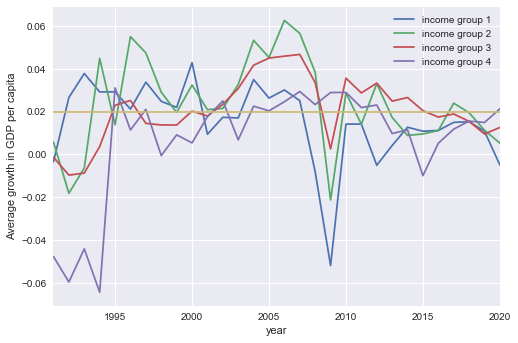

In [134]:
join_group11991= join_group1[join_group1.year > 1990]
join_group21991= join_group2[join_group2.year > 1990] 
join_group31991= join_group3[(join_group3.year > 1990) & (join_group3.Location_x != "Eritrea")]
join_group41991= join_group4[join_group4.year > 1990]


join_group11991.groupby(["year"]).growth_GDP.mean().plot()
join_group21991.groupby(["year"]).growth_GDP.mean().plot().grid(True)
join_group31991.groupby(["year"]).growth_GDP.mean().plot().set_ylabel("Average growth in GDP per capita")
join_group41991.groupby(["year"]).growth_GDP.mean().plot().legend(["income group 1","income group 2","income group 3","income group 4"])
x_coordinates = [1990, 2020]
y_coordinates = [0.02, 0.02]

plt.plot(x_coordinates, y_coordinates);

Finally, we want to see if there is any correlation between the average growth rates in GDP per capita and population. To do so, we concatenate the 4 income groups data sets into one final data set, which we call "outcome". Again, we remove 1990 and Eritrea. 

In [127]:
# Merge group tables
outcome = pd.concat([join_group1, join_group2, join_group3, join_group4])

outcome1991 = outcome[(outcome.year > 1990) & (outcome.Location_x != "Eritrea")]
outcome1991.head(10)

,Location_x,Location code,year,GDP,pop,log_GDP,log_pop,growth_GDP,growth_pop,income_group
1,Bahrain,BHR,1991,20806.8,481.002,9.943035,6.175871,0.078086,0.027051,group_1
2,Bahrain,BHR,1992,21644.7,493.839,9.982516,6.202210,0.039481,0.026338,group_1
3,Bahrain,BHR,1993,23835.0,506.676,10.078910,6.227872,0.096394,0.025662,group_1
4,Bahrain,BHR,1994,23184.9,519.512,10.051256,6.252890,-0.027654,0.025018,group_1
5,Bahrain,BHR,1995,23470.6,532.349,10.063504,6.277299,0.012247,0.024409,group_1
6,Bahrain,BHR,1996,23562.8,551.982,10.067424,6.313515,0.003921,0.036216,group_1
7,Bahrain,BHR,1997,22389.7,599.403,10.016356,6.395934,-0.051068,0.082419,group_1
8,Bahrain,BHR,1998,21122.3,666.093,9.958085,6.501429,-0.058272,0.105495,group_1
9,Bahrain,BHR,1999,19991.7,733.678,9.903072,6.598070,-0.055012,0.096641,group_1
10,Bahrain,BHR,2000,24500.6,630.513,10.106453,6.446534,0.203380,-0.151536,group_1


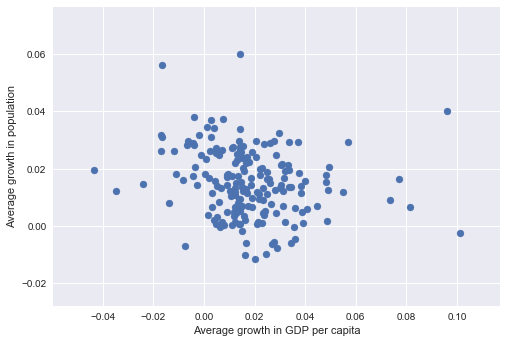

In [128]:
# Scatter plot
scatterx = outcome1991.groupby(["Location_x"]).growth_GDP.mean()
scattery = outcome1991.groupby(["Location_x"]).growth_pop.mean()


plt.scatter(scatterx, scattery)
plt.xlabel("Average growth in GDP per capita")
plt.ylabel("Average growth in population");
plt.grid(True)
#groups = outcome1991.groupby('income_group')
#colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')_get_standard_colors


In [129]:
outliers = outcome[outcome.growth_GDP >=1.5]

outliers.head(100)

,Location_x,Location code,year,GDP,pop,log_GDP,log_pop,growth_GDP,growth_pop,income_group
1368,Belarus,BLR,1994,2124.22,10108.30,7.661160,9.221112,2.053712,-0.002648,group_2
250,Eritrea,ERI,1992,961.80,2236.88,6.868807,7.712837,14.586499,-0.004852,group_3
682,Syrian Arab Republic,SYR,1990,1174.95,12446.20,7.068981,9.429171,2.426640,-0.244476,group_4


# Conclusion

In [130]:
outliers_2 = outcome[outcome.Location_x=='Norway']

outliers_2.head(30)

,Location_x,Location code,year,GDP,pop,log_GDP,log_pop,growth_GDP,growth_pop,income_group
1364,Norway,NOR,1990,49772.40,4243.560,10.815216,8.353158,0.042577,-1.412739,group_1
1365,Norway,NOR,1991,51058.40,4264.705,10.840725,8.358128,0.025509,0.004970,group_1
1366,Norway,NOR,1992,52582.30,4289.592,10.870135,8.363947,0.029409,0.005819,group_1
1367,Norway,NOR,1993,53734.80,4315.195,10.891816,8.369898,0.021681,0.005951,group_1
1368,Norway,NOR,1994,56109.10,4339.560,10.935053,8.375528,0.043237,0.005630,group_1
1369,Norway,NOR,1995,58179.20,4361.878,10.971283,8.380658,0.036230,0.005130,group_1
1370,Norway,NOR,1996,60806.30,4384.178,11.015449,8.385757,0.044165,0.005099,group_1
1371,Norway,NOR,1997,63654.50,4408.270,11.061225,8.391238,0.045777,0.005480,group_1
1372,Norway,NOR,1998,64950.00,4434.930,11.081373,8.397267,0.020148,0.006030,group_1
1373,Norway,NOR,1999,65776.80,4466.060,11.094022,8.404262,0.012649,0.006995,group_1


In this project we have worked with two data sets; one containing the GDP per capita for most countries from 1990 to 2019 and another containing the population for most countries in the same period. We started by cleaning both data sets and then made interactive plots of both variables in order to investigate the data and thereafter merged the two data sets to look at the correlation.

In the analysis we divided all the countries into four different income groups based on the 25th, 50th and 75th quantile of GDP per capita in 2019. Then we calculated the growth rates for both GDP per capita and population.

We graphed the average growth rates for the 4 income groups to investigate if there was any noticeable difference. 
We see that in the early 90's income group 3 and 4 had negative growth rates, which income group 3 escape earlier than income group 4.
From around 2000 and foreward, income group 1 seems to have a lower growth rate than the three other groups, which can be a sign of convergence in global income.
Worth noting is aound the financial crisis in 2008, where the highest income groups have the lowest growth rates.

Finally, we make a scatterplot to examine the correlation between growth in population and GDP per capita. Some theories claim that there might be a positive correlation due to economics of scale in the economy. We do not find any graphical evidence to support these theories. 